# Assignment 4 - Marvin Lomo

Import the Credit Card dataset. This datset contains the following information:

1. Gender (categorical): Male/Female
2. Car Owner (categorical): Yes/No
3. Property Owner (Categorical): Yes/No
4. Children (Numerical): Number of Children
5. Annual Income (Numerical): Income of the applicant in dollar
6. Type Income (Categorical): Applicant's source of income
7. Higher Education (Categorical): Yes/No
8. Marital Status (Categorical): Married/Not-Married
9. Age (Numerical)
10. Employed (Categorical): Yes/No
11. Family Members (Numerical): Applicant's family size
12. Approved (Categorical): Dependent Variable. Credit Card request is approved or not?

## Logistic Regression:


In [1]:
library(tidyverse)
library(tidymodels)
library(corrr)
library(rpart.plot)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0

In [2]:
# Loading the dataset
df_url <- 'data/credit_card.csv'


credit_df <- read_csv(df_url)


# Preview the df
head(credit_df)

Rows: 1496 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): GENDER, Car_Owner, Propert_Owner, Type_Income, Higher Education, Ma...
dbl (6): Ind_ID, CHILDREN, Annual_income, Age, Family_Members, Approved

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Higher Education,Marital_status,Age,Employed,Family_Members,Approved
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
5008827,M,Y,Y,0,180000,Pensioner,Y,Married,51,N,2,0
5009744,F,Y,N,0,315000,Commercial associate,Y,Married,37,Y,2,0
5009752,F,Y,N,0,315000,Commercial associate,Y,Married,37,Y,2,0
5009754,F,Y,N,0,315000,Commercial associate,Y,Married,37,Y,2,0
5009894,F,N,N,0,180000,Pensioner,N,Married,60,N,2,0
5010864,M,Y,Y,1,450000,Commercial associate,N,Married,49,Y,3,0


In [3]:
# glimpse of the data
glimpse(credit_df)

Rows: 1,496
Columns: 13
$ Ind_ID             <dbl> 5008827, 5009744, 5009752, 5009754, 5009894, 501086…
$ GENDER             <chr> "M", "F", "F", "F", "F", "M", "M", "M", "F", "F", "…
$ Car_Owner          <chr> "Y", "Y", "Y", "Y", "N", "Y", "Y", "Y", "Y", "Y", "…
$ Propert_Owner      <chr> "Y", "N", "N", "N", "N", "Y", "Y", "Y", "Y", "Y", "…
$ CHILDREN           <dbl> 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ Annual_income      <dbl> 180000, 315000, 315000, 315000, 180000, 450000, 450…
$ Type_Income        <chr> "Pensioner", "Commercial associate", "Commercial as…
$ `Higher Education` <chr> "Y", "Y", "Y", "Y", "N", "N", "N", "N", "N", "N", "…
$ Marital_status     <chr> "Married", "Married", "Married", "Married", "Marrie…
$ Age                <dbl> 51, 37, 37, 37, 60, 49, 49, 49, 51, 51, 24, 46, 46,…
$ Employed           <chr> "N", "Y", "Y", "Y", "N", "Y", "Y", "Y", "Y", "Y", "…
$ Family_Members     <dbl> 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 1, 2, 1, …
$ Approved      

### Question 1.

#### Part1: 
Use ggplot to plot the results of credit card applications (i.e., Approved) against applicant's annual income. (use geo_point function).

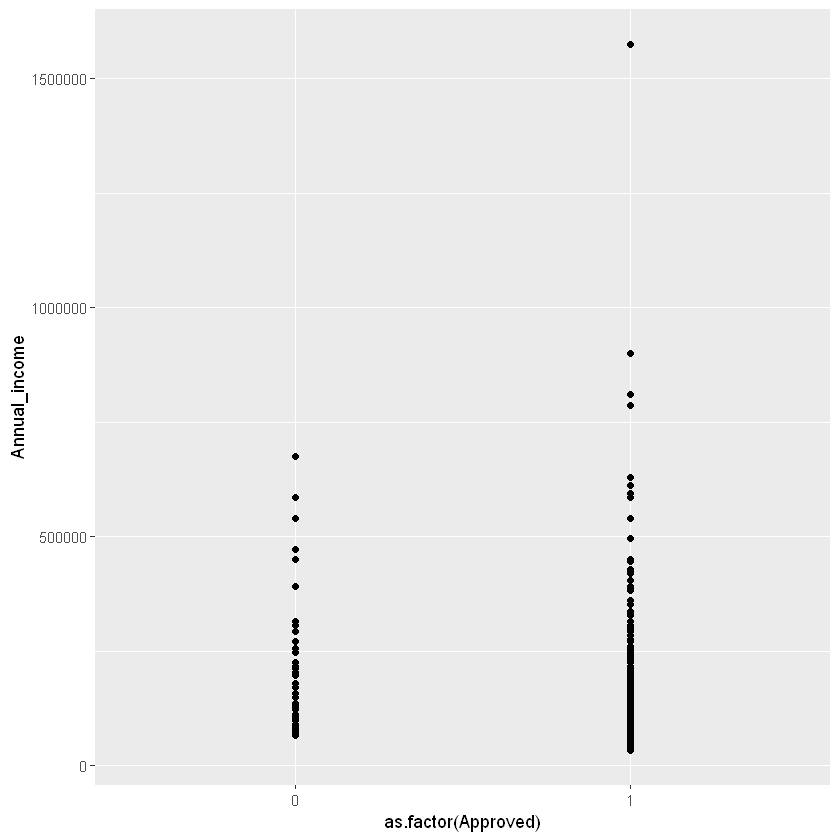

In [4]:
credit_df |>
        ggplot(
            aes(x = as.factor(Approved), y = Annual_income)
            ) +
            # Producing a scatterplot
            geom_point()

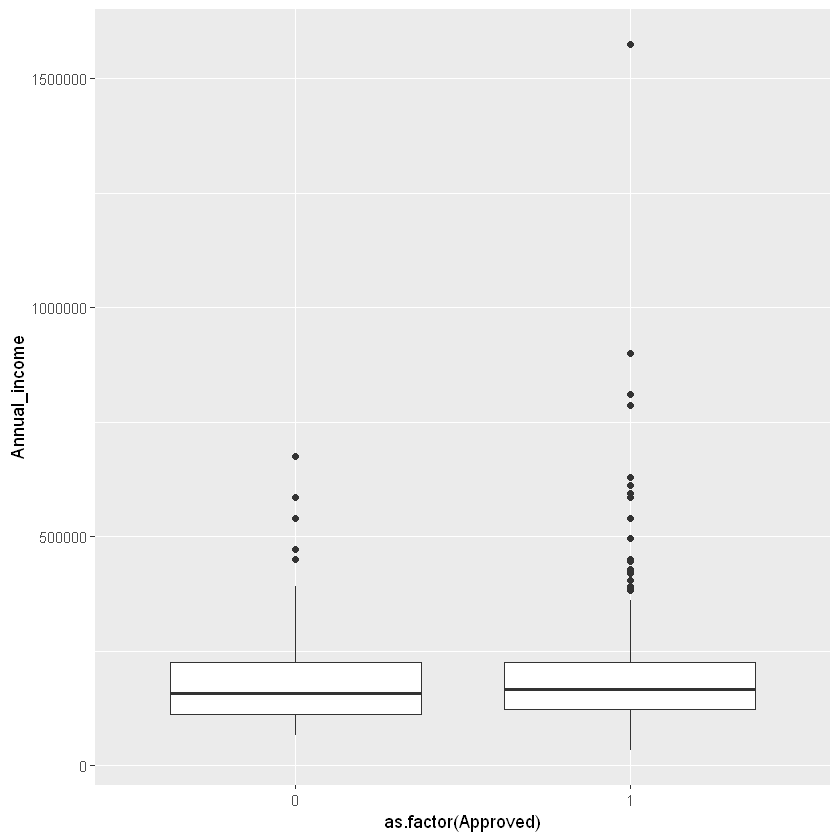

In [5]:
credit_df |>
        ggplot(
            aes(x = as.factor(Approved), y = Annual_income)
            ) +
            # Producing a boxplot
            geom_boxplot()

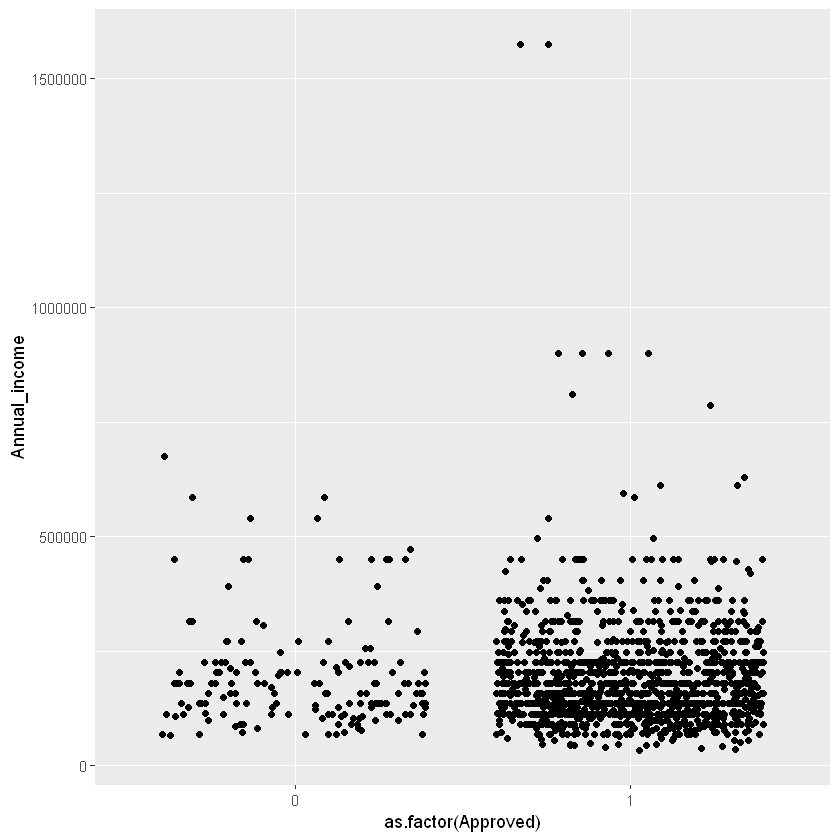

In [6]:
credit_df |>
        ggplot(
            aes(x = as.factor(Approved), y = Annual_income)
            ) +
            # Producing a Jitter
            geom_jitter()

> The boxplot above shows that on average approved owners with higher annual income receive more approved transactions.

In [7]:
# Converting the target colum to a facto
credit_df <- mutate(credit_df, Approved = as.factor(Approved))

# Building a recipe to prepare the data

credit_recipe <-
        # The formula for the logistic regression model
        recipe(Approved ~ ., data = credit_df) |>
        # update the role of Ind_ID
        update_role(Ind_ID, new_role = 'unique_id') |>
        # Normalize all numerical features
        step_normalize(all_numeric_predictors()) |>
        # Dummy all the nominal data
        step_dummy(all_nominal_predictors())

In [8]:
# Preview the Prepared Data
credit_recipe |>
    prep() |>
    bake(new_data=NULL) |>
    glimpse()

Rows: 1,496
Columns: 15
$ Ind_ID                     <dbl> 5008827, 5009744, 5009752, 5009754, 5009894…
$ CHILDREN                   <dbl> -0.5325100, -0.5325100, -0.5325100, -0.5325…
$ Annual_income              <dbl> -0.09523779, 1.09799131, 1.09799131, 1.0979…
$ Age                        <dbl> 0.65379636, -0.55520161, -0.55520161, -0.55…
$ Family_Members             <dbl> -0.1734769, -0.1734769, -0.1734769, -0.1734…
$ Approved                   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ GENDER_M                   <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0…
$ Car_Owner_Y                <dbl> 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0…
$ Propert_Owner_Y            <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1…
$ Type_Income_Pensioner      <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0…
$ Type_Income_State.servant  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Type_Income_Working        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0…
$ `Higher Educat

#### Part 2: 

Develop a Logistic Regression model in which the dependent variable is "Approved" and the independent variables are all other variables in the dataset (except for the ID column).
Which variables are significant predictors of the credit card approval?

In [9]:
# Defining the logistic regression model

log_reg_mod <- logistic_reg() |>
                set_engine('glm') 



# The workflow
log_reg_wflow <- workflow() |>
                 add_model(log_reg_mod) |>
                 add_recipe(credit_recipe)


# Fit the log_Reg model to the data
log_reg_fit <- fit(log_reg_wflow, credit_df)

# Preview the summary
log_reg_fit |>
        tidy() |>
        # Checking for significance
        mutate(significance = ifelse(test = (p.value <= 0.05), yes = 'Significant',no = 'Not Significant'))


term,estimate,std.error,statistic,p.value,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),6.46416018,1.16286691,5.5588134,2.716149e-08,Significant
CHILDREN,1.76440744,0.50481217,3.4951761,4.737491e-04,Significant
Annual_income,0.03379591,0.09749829,0.3466308,7.288687e-01,Not Significant
Age,-0.19467752,0.11384931,-1.7099579,8.727367e-02,Not Significant
Family_Members,-2.15175182,0.60111591,-3.5795955,3.441265e-04,Significant
GENDER_M,-0.55122132,0.19534112,-2.8218397,4.774904e-03,Significant
Car_Owner_Y,0.25675379,0.19879853,1.2915276,1.965208e-01,Not Significant
Propert_Owner_Y,0.12823463,0.18192983,0.7048577,4.808988e-01,Not Significant
Type_Income_Pensioner,-3.52684312,1.10956180,-3.1785910,1.479928e-03,Significant


#### Part 3: 

How do you interpret the estimated coefficient for the annual-income variable? 

> The `annual_income` variable has a `positive coefficient` meaning that higher annual income increases the likelihood/probability of an Approved credit card request

#### Part 4: 

How do you interpret the estimated coefficients for the different levels of the "Type_Income" Variable?

The `type_income` variable has the ff levels:
- `Type_Income_Pensioner` has a `negative coefficient` meaning pensioners have a lower chance of having a credit card request approved
-  `Type_Income_State.servant` and `Type_Income_Working` have a `positive coefficient` meaning servants and working professionals have a higher likelihood of approved credit card request.
-  `Commercial Associates` have a higher likelihood of credit card approval than pensioners.

### Question 2:

#### Part 1: 

In the previous Regression model, two of the independent variables have the potential to be highly correlated. Which variables do you think are highly correlated? Why? (use cor() function to measure their correlation). 

In [10]:
# Correlation matrix with correlate
correlate(credit_df)

Non-numeric variables removed from input: `GENDER`, `Car_Owner`, `Propert_Owner`, `Type_Income`, `Higher Education`, `Marital_status`, `Employed`, and `Approved`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,Ind_ID,CHILDREN,Annual_income,Age,Family_Members
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ind_ID,NA,0.02607782,0.03116802,-0.02399296,0.01021936
CHILDREN,0.02607782,NA,0.07888430,-0.28134775,0.89139940
Annual_income,0.03116802,0.07888430,NA,-0.10825501,0.05154557
Age,-0.02399296,-0.28134775,-0.10825501,NA,-0.27008001
Family_Members,0.01021936,0.89139940,0.05154557,-0.27008001,NA


From the above correlation matrix. The ff variables are highly correlated:
- Family Members and Children

#### Part 2: 

Develop another logistic regression model similar to the previous model (LogisticRegression1), but drop one of the two highly correlated variables and keep the other one. Is the preserved variable still significant?

In [11]:
# Building a recipe to prepare the data

credit_recipe_2 <-
        # The formula for the logistic regression model
        recipe(Approved ~ ., data = credit_df) |>
        # update the role of Ind_ID
        update_role(Ind_ID, new_role = 'unique_id') |>
        # Dropping the Family_Members column |>
        update_role(Family_Members, new_role = 'dropped_fam_col') |>
        # Normalize all numerical features
        step_normalize(all_numeric_predictors()) |>
        # Dummy all the nominal data
        step_dummy(all_nominal_predictors())



# Preview the Prepared Data
credit_recipe_2 |>
    prep() |>
    bake(new_data=NULL) |>
    glimpse()

Rows: 1,496
Columns: 15
$ Ind_ID                     <dbl> 5008827, 5009744, 5009752, 5009754, 5009894…
$ CHILDREN                   <dbl> -0.5325100, -0.5325100, -0.5325100, -0.5325…
$ Annual_income              <dbl> -0.09523779, 1.09799131, 1.09799131, 1.0979…
$ Age                        <dbl> 0.65379636, -0.55520161, -0.55520161, -0.55…
$ Family_Members             <dbl> 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 1…
$ Approved                   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ GENDER_M                   <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0…
$ Car_Owner_Y                <dbl> 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0…
$ Propert_Owner_Y            <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1…
$ Type_Income_Pensioner      <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0…
$ Type_Income_State.servant  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Type_Income_Working        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0…
$ `Higher Educat

In [12]:
# Defining the logistic regression model

log_reg_mod_2 <- logistic_reg() |>
                set_engine('glm') 



# The workflow
log_reg_wflow_2 <- workflow() |>
                 add_model(log_reg_mod_2) |>
                 add_recipe(credit_recipe_2)


# Fit the log_Reg model to the data
log_reg_fit_2 <- fit(log_reg_wflow_2, credit_df)

# Preview the summary
log_reg_fit_2 |>
        tidy() |>
        # Checking for significance
        mutate(significance = ifelse(test = (p.value <= 0.05), yes = 'Significant',no = 'Not Significant'))


term,estimate,std.error,statistic,p.value,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),6.08013159,1.14166314,5.3256791,1.005765e-07,Significant
CHILDREN,-0.01052731,0.08805540,-0.1195532,9.048371e-01,Not Significant
Annual_income,0.04974508,0.09787191,0.5082672,6.112660e-01,Not Significant
Age,-0.19115143,0.11283262,-1.6941149,9.024346e-02,Not Significant
GENDER_M,-0.55214576,0.19418566,-2.8433910,4.463628e-03,Significant
Car_Owner_Y,0.25117345,0.19745302,1.2720669,2.033494e-01,Not Significant
Propert_Owner_Y,0.13541311,0.18046115,0.7503727,4.530303e-01,Not Significant
Type_Income_Pensioner,-3.68485639,1.09650667,-3.3605417,7.778978e-04,Significant
Type_Income_State.servant,1.18969121,0.48625111,2.4466602,1.441867e-02,Significant


### Question 3:

#### Part 1: 

Split the Credit_Card_Data into a training (70%) and a test set (30%). 

In [13]:
# Spliting df into train and test

set.seed(123)

# Provide the criterial for spliting
credit_split <- initial_split(credit_df, prop = 0.7, strata = Approved) 

# Greate the train df
credit_train_df <- training(credit_split)

# Create the test df
credit_test_df <- testing(credit_split)

In [14]:
# Preview the train df
glimpse(credit_train_df)

Rows: 1,047
Columns: 13
$ Ind_ID             <dbl> 5009754, 5009894, 5010864, 5010868, 5010869, 502131…
$ GENDER             <chr> "F", "F", "M", "M", "M", "M", "M", "F", "F", "M", "…
$ Car_Owner          <chr> "Y", "N", "Y", "Y", "Y", "N", "N", "N", "N", "N", "…
$ Propert_Owner      <chr> "N", "N", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "…
$ CHILDREN           <dbl> 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Annual_income      <dbl> 315000, 180000, 450000, 450000, 450000, 270000, 270…
$ Type_Income        <chr> "Commercial associate", "Pensioner", "Commercial as…
$ `Higher Education` <chr> "Y", "N", "N", "N", "N", "N", "N", "Y", "Y", "N", "…
$ Marital_status     <chr> "Married", "Married", "Married", "Married", "Not-Ma…
$ Age                <dbl> 37, 60, 49, 49, 49, 46, 46, 51, 51, 51, 35, 43, 43,…
$ Employed           <chr> "Y", "N", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "…
$ Family_Members     <dbl> 2, 2, 3, 3, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, …
$ Approved      

In [15]:
# Preview the test df
glimpse(credit_test_df)

Rows: 449
Columns: 13
$ Ind_ID             <dbl> 5008827, 5009744, 5009752, 5018498, 5018503, 502130…
$ GENDER             <chr> "M", "F", "F", "F", "F", "M", "M", "M", "F", "F", "…
$ Car_Owner          <chr> "Y", "Y", "Y", "Y", "Y", "N", "Y", "N", "N", "Y", "…
$ Propert_Owner      <chr> "Y", "N", "N", "Y", "Y", "N", "Y", "Y", "Y", "N", "…
$ CHILDREN           <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, …
$ Annual_income      <dbl> 180000, 315000, 315000, 90000, 90000, 472500, 20250…
$ Type_Income        <chr> "Pensioner", "Commercial associate", "Commercial as…
$ `Higher Education` <chr> "Y", "Y", "Y", "N", "N", "Y", "N", "Y", "N", "N", "…
$ Marital_status     <chr> "Married", "Married", "Married", "Married", "Marrie…
$ Age                <dbl> 51, 37, 37, 51, 51, 24, 32, 48, 33, 43, 52, 63, 50,…
$ Employed           <chr> "N", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "…
$ Family_Members     <dbl> 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 2, 1, 2, 2, 3, 2, 3, …
$ Approved        

#### Part 2: 

Train another logistic regression model similar to Question 2, but use the following independent variables instead: Gender, Annual-Income, Type_Income, Marital_Status, Employed. Name this model as LogistiRegression3. Make sure to use the training dataset to train this model.

In [16]:
credit_recipe_3 <-
        # The formula for the logistic regression model using the training dataset
        recipe(Approved ~ GENDER + Annual_income + Type_Income + Marital_status + Employed, data = credit_train_df) |>
        # Normalize all numerical features
        step_normalize(all_numeric_predictors()) |>
        # Dummy all the nominal data
        step_dummy(all_nominal_predictors())



# Preview the Prepared Data
credit_recipe_3 |>
    prep() |>
    bake(new_data=NULL) |>
    glimpse()

Rows: 1,047
Columns: 8
$ Annual_income              <dbl> 1.03054337, -0.11197434, 2.17306108, 2.1730…
$ Approved                   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ GENDER_M                   <dbl> 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1…
$ Type_Income_Pensioner      <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ Type_Income_State.servant  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Type_Income_Working        <dbl> 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0…
$ Marital_status_Not.Married <dbl> 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0…
$ Employed_Y                 <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1…


In [17]:
# Defining the logistic regression model

log_reg_mod_3 <- logistic_reg() |>
                set_engine('glm') 



# The workflow
log_reg_wflow_3 <- workflow() |>
                 add_model(log_reg_mod_3) |>
                 add_recipe(credit_recipe_3)


# Fit the log_Reg model to the training data
log_reg_fit_3 <- fit(log_reg_wflow_3, credit_train_df)

# Preview the summary
log_reg_fit_3 |>
        tidy() |>
        # Checking for significance
        mutate(significance = ifelse(test = (p.value <= 0.05), yes = 'Significant',no = 'Not Significant'))


term,estimate,std.error,statistic,p.value,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),5.99404323,1.1863063,5.0526943,4.356208e-07,Significant
Annual_income,0.04048643,0.1097949,0.3687459,7.123172e-01,Not Significant
GENDER_M,-0.57312265,0.2162950,-2.6497264,8.055697e-03,Significant
Type_Income_Pensioner,-3.56815957,1.1456821,-3.1144412,1.842937e-03,Significant
Type_Income_State.servant,0.80498259,0.5527807,1.4562423,1.453256e-01,Not Significant
Type_Income_Working,0.14170658,0.2503523,0.5660288,5.713742e-01,Not Significant
Marital_status_Not.Married,-0.58077565,0.2175246,-2.6699305,7.586695e-03,Significant
Employed_Y,-3.51678041,1.1594842,-3.0330559,2.420908e-03,Significant


#### Part 3: 

Make a prediction for the values of the dependent variable in the "test set" using the LogisticRegression3 model. Use mutate to add the predicted values to the test set. Note: Make sure to convert the predicted probabilities into actual labels (0 and 1) as shown in the week 10 lecture note.

In [18]:
# Get your predictions
pred_class <- predict(log_reg_fit_3, new_data = credit_test_df)

# Augment the test dataframe with predicted class
credit_test_df <- credit_test_df |>
                    mutate(log_reg_pred = pred_class$.pred_class)
# Preview resulting df
head(credit_test_df)

Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Higher Education,Marital_status,Age,Employed,Family_Members,Approved,log_reg_pred
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<fct>
5008827,M,Y,Y,0,180000,Pensioner,Y,Married,51,N,2,0,1
5009744,F,Y,N,0,315000,Commercial associate,Y,Married,37,Y,2,0,1
5009752,F,Y,N,0,315000,Commercial associate,Y,Married,37,Y,2,0,1
5018498,F,Y,Y,0,90000,Working,N,Married,51,Y,2,0,1
5018503,F,Y,Y,0,90000,Working,N,Married,51,Y,2,0,1
5021303,M,N,N,1,472500,Pensioner,Y,Married,24,Y,3,0,0


#### Part 4: 

use confusion matrix to measure the accuracy of the trained model.

In [19]:
# Confusion Matrix
conf_mat(credit_test_df, truth = Approved, estimate = log_reg_pred)

          Truth
Prediction   0   1
         0   2   0
         1  46 401

In [20]:
accuracy(credit_test_df, truth = Approved, estimate = log_reg_pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8975501


### Question 4 - Decision Tree

#### Part 1: 

Train a decision tree using Approved as the dependent variable, and the following variables as the independent variables:
GENDER, Type_Income, Marital_status, Employed.

In [33]:
dec_tree_class = decision_tree(mode = 'classification') |>
                    set_engine('rpart')

credit_recipe_4 <-
        # The formula for the logistic regression model
        recipe(Approved ~ GENDER + Type_Income + Marital_status + Employed, data = credit_df) |>
        # Dummy all the nominal data
        step_dummy(all_nominal_predictors())



# Preview the Prepared Data
credit_recipe_4 |>
    prep() |>
    bake(new_data=NULL) |>
    glimpse()

Rows: 1,496
Columns: 7
$ Approved                   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ GENDER_M                   <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0…
$ Type_Income_Pensioner      <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0…
$ Type_Income_State.servant  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Type_Income_Working        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0…
$ Marital_status_Not.Married <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1…
$ Employed_Y                 <dbl> 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [34]:
# The workflow
dec_tree_class_wflow <- workflow() |>
                     add_model(dec_tree_class) |>
                     add_recipe(credit_recipe_4) 

# Fit the workflow to the training data
dec_tree_class_fit = fit(dec_tree_class_wflow, data = credit_df)

#### Part 2: 

Plot the tree.

Warning message:
"Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."


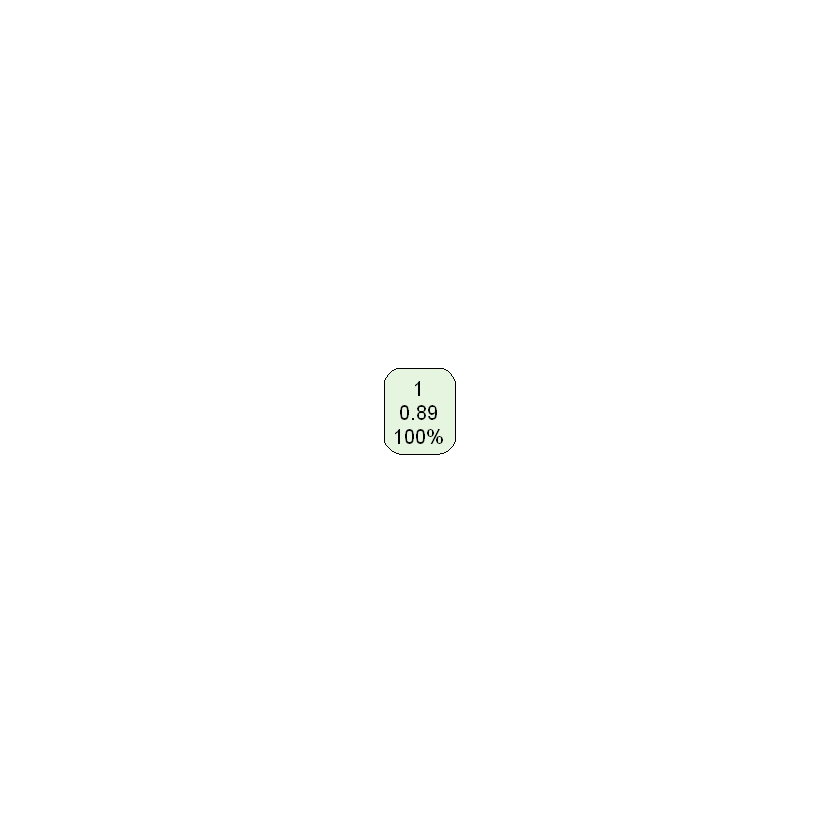

In [35]:
rpart.plot(dec_tree_class_fit$fit$fit$fit)

### Question 5:

#### Part 1: 

Train a decision tree using the "Credit_Card_Data_train" dataset. The model should be similar to question 4.

In [24]:
dec_tree_class_2 = decision_tree(mode = 'classification') |>
                    set_engine('rpart')

credit_recipe_5 <-
        # The formula for the logistic regression model
        recipe(Approved ~ GENDER + Type_Income + Marital_status + Employed, data = credit_train_df) |>
        # Dummy all the nominal data
        step_dummy(all_nominal_predictors())



# Preview the Prepared Data
credit_recipe_5 |>
    prep() |>
    bake(new_data=NULL) |>
    glimpse()

Rows: 1,047
Columns: 7
$ Approved                   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ GENDER_M                   <dbl> 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1…
$ Type_Income_Pensioner      <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ Type_Income_State.servant  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Type_Income_Working        <dbl> 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0…
$ Marital_status_Not.Married <dbl> 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0…
$ Employed_Y                 <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1…


In [53]:
# The workflow
dec_tree_class_wflow_2 <- workflow() |>
                         add_model(dec_tree_class_2) |>
                         add_recipe(credit_recipe_5) 

# Fit the workflow to the training data
dec_tree_class_fit_2 = fit(dec_tree_class_wflow_2, data = credit_train_df)

Warning message:
"Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."


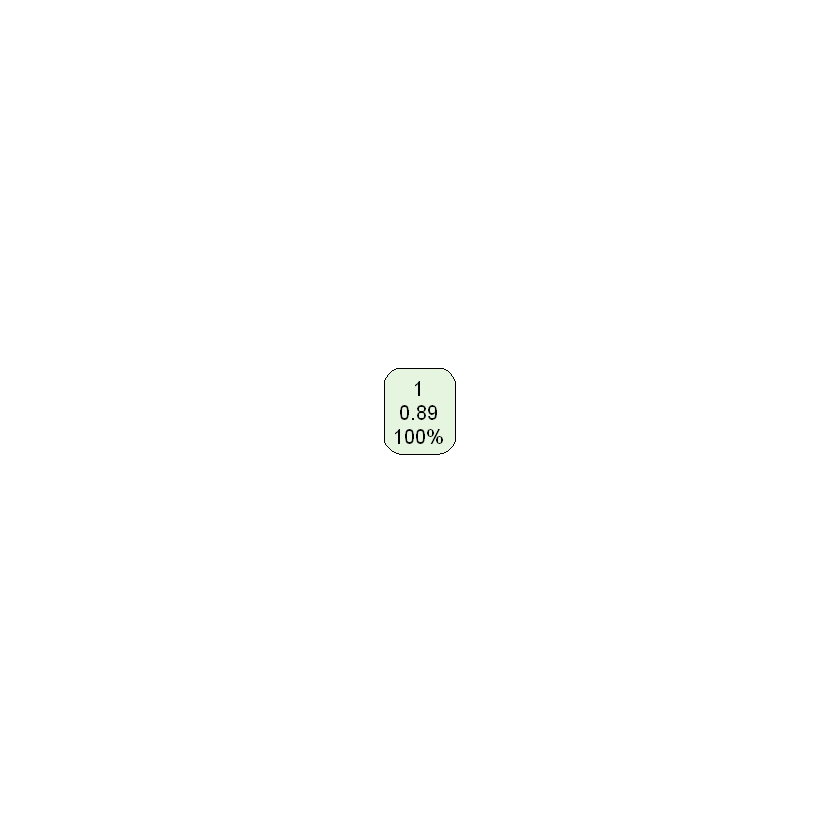

In [44]:
rpart.plot(dec_tree_class_fit_2$fit$fit$fit)

#### Part 2: 

Use the trained decision tree to make a prediction for the test set (i.e., Credit_Card_Data_test).

In [26]:
# Get your predictions
pred_class <- predict(dec_tree_class_fit_2, 
                      new_data = credit_test_df)



# Augment the test dataframe with predicted class
credit_test_df <- credit_test_df |>
                    mutate(dec_tree_pred = pred_class$.pred_class)
# Preview resulting df
head(credit_test_df)

Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Higher Education,Marital_status,Age,Employed,Family_Members,Approved,log_reg_pred,dec_tree_pred
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>
5008827,M,Y,Y,0,180000,Pensioner,Y,Married,51,N,2,0,1,1
5009744,F,Y,N,0,315000,Commercial associate,Y,Married,37,Y,2,0,1,1
5009752,F,Y,N,0,315000,Commercial associate,Y,Married,37,Y,2,0,1,1
5018498,F,Y,Y,0,90000,Working,N,Married,51,Y,2,0,1,1
5018503,F,Y,Y,0,90000,Working,N,Married,51,Y,2,0,1,1
5021303,M,N,N,1,472500,Pensioner,Y,Married,24,Y,3,0,0,1


#### Part 3: 

Use confusion matrix to measure the accuracy of the decision tree.

In [27]:
# Confusion Matrix
conf_mat(credit_test_df, truth = Approved, estimate = dec_tree_pred)

          Truth
Prediction   0   1
         0   0   0
         1  48 401

In [28]:
# Accuracy
accuracy(credit_test_df, truth = Approved, estimate = dec_tree_pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8930958


Warning message:
"Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."


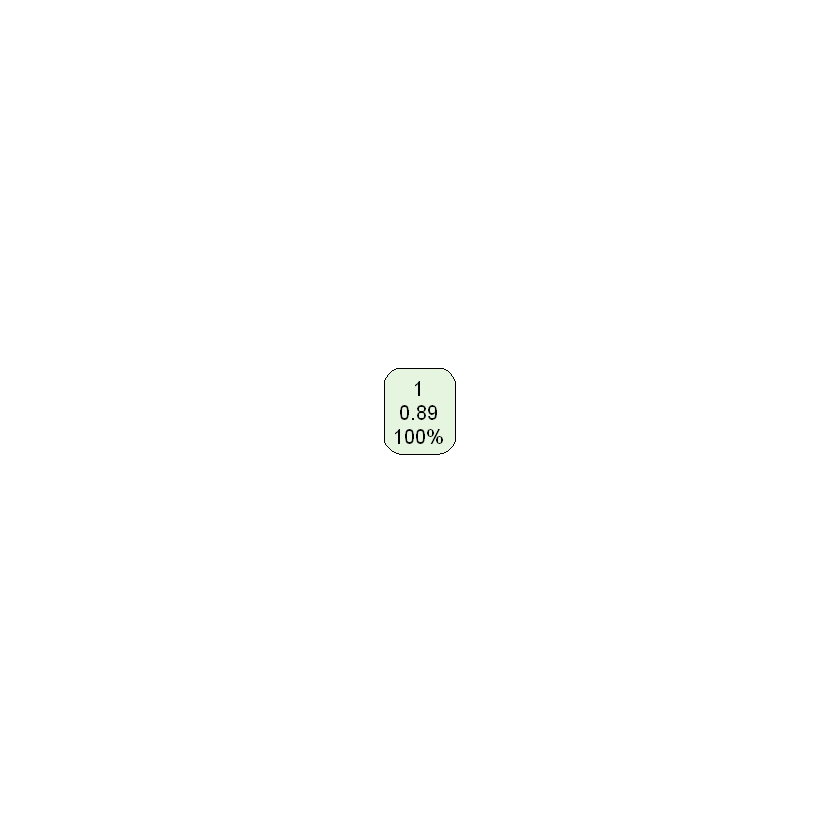

In [29]:
dec_tree_class_fit_3 <- workflow() |>
                         add_recipe(credit_recipe_5) |>
                         add_model(dec_tree_class_2) |>
                         fit(data = credit_train_df)

rpart.plot::rpart.plot(dec_tree_class_fit_3$fit$fit$fit)